In [1]:
# Step 1: Data Loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load Data
airlines=pd.read_csv(r"D:\2015 Flight Delays and Cancellations\airlines.csv")
airports=pd.read_csv(r"D:\2015 Flight Delays and Cancellations\airports.csv")
flights=pd.read_csv(r"D:\2015 Flight Delays and Cancellations\flights.csv")

pd.set_option("display.max_columns",None)


# Logic 1: For flights that were not cancelled, if ARRIVAL_DELAY is missing, consider them on time (fill with 0)
flights.loc[(flights['CANCELLED'] == 0) & (flights['ARRIVAL_DELAY'].isna()),'ARRIVAL_DELAY']=0
# Logic 2: Keep ARRIVAL_DELAY as NaN for cancelled flights (since they did not actually arrive)
flights.loc[flights['CANCELLED'] == 1,'ARRIVAL_DELAY']=np.nan
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 31 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   YEAR                 1048575 non-null  int64  
 1   MONTH                1048575 non-null  int64  
 2   DAY                  1048575 non-null  int64  
 3   DAY_OF_WEEK          1048575 non-null  int64  
 4   AIRLINE              1048575 non-null  object 
 5   FLIGHT_NUMBER        1048575 non-null  int64  
 6   TAIL_NUMBER          1040825 non-null  object 
 7   ORIGIN_AIRPORT       1048575 non-null  object 
 8   DESTINATION_AIRPORT  1048575 non-null  object 
 9   SCHEDULED_DEPARTURE  1048575 non-null  int64  
 10  DEPARTURE_TIME       1009060 non-null  float64
 11  DEPARTURE_DELAY      1009060 non-null  float64
 12  TAXI_OUT             1008346 non-null  float64
 13  WHEELS_OFF           1008346 non-null  float64
 14  SCHEDULED_TIME       1048573 non-null  float64
 15

In [2]:
# Step 2: Data Merging
flights=pd.merge(flights,airlines,how="left",left_on="AIRLINE",right_on="IATA_CODE")# Merge Airline Information
flights=pd.merge(flights,airports.add_prefix('ORIGIN_'),how="left",left_on="ORIGIN_AIRPORT",right_on="ORIGIN_IATA_CODE")# Merge Departure Airport Information
flights=pd.merge(flights,airports.add_prefix('DEST_'),how="left",left_on="DESTINATION_AIRPORT",right_on="DEST_IATA_CODE")# Merge Arrival Airport Information

flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT_x,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y,ORIGIN_IATA_CODE,ORIGIN_AIRPORT_y,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DEST_IATA_CODE,DEST_AIRPORT,DEST_CITY,DEST_STATE,DEST_COUNTRY,DEST_LATITUDE,DEST_LONGITUDE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,2354.0,-11.0,21.0,15.0,205.0,194.0,169.0,1448,404.0,4.0,430,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,2.0,-8.0,12.0,14.0,280.0,279.0,263.0,2330,737.0,4.0,750,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,PBI,Palm Beach International Airport,West Palm Beach,FL,USA,26.68316,-80.09559
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,18.0,-2.0,16.0,34.0,286.0,293.0,266.0,2296,800.0,11.0,806,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,US,US Airways Inc.,SFO,San Francisco International Airport,San Francisco,CA,USA,37.61900,-122.37484,CLT,Charlotte Douglas International Airport,Charlotte,NC,USA,35.21401,-80.94313
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,15.0,-5.0,15.0,30.0,285.0,281.0,258.0,2342,748.0,8.0,805,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AA,American Airlines Inc.,LAX,Los Angeles International Airport,Los Angeles,CA,USA,33.94254,-118.40807,MIA,Miami International Airport,Miami,FL,USA,25.79325,-80.29056
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,24.0,-1.0,11.0,35.0,235.0,215.0,199.0,1448,254.0,5.0,320,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2015,3,10,2,EV,4122,N11191,RDU,EWR,1013,1005.0,-8.0,17.0,1022.0,96.0,88.0,64.0,416,1126.0,7.0,1149,1133.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,EV,Atlantic Southeast Airlines,RDU,Raleigh-Durham International Airport,Raleigh,NC,USA,35.87764,-78.78747,EWR,Newark Liberty International Airport,Newark,NJ,USA,40.69250,-74.16866
1048571,2015,3,10,2,UA,1018,N79279,LGA,IAH,1013,1005.0,-8.0,40.0,1045.0,264.0,270.0,219.0,1416,1324.0,11.0,1337,1335.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,LGA,LaGuardia Airport (Marine Air Terminal),New York,NY,USA,40.77724,-73.87261,IAH,George Bush Intercontinental Airport,Houston,TX,USA,29.98047,-95.33972
1048572,2015,3,10,2,UA,1260,N76508,SAN,ORD,1013,1010.0,-3.0,21.0,1031.0,251.0,257.0,220.0,1723,1611.0,16.0,1624,1627.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,UA,United Air Lines Inc.,SAN,San Diego International Airport (Lindbergh Field),San Diego,CA,USA,32.73356,-117.18966,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446
1048573,2015,3,10,2,EV,4349,N14158,MSY,ORD,1013,1003.0,-10.0,10.0,1013.0,149.0,146.0,127.0,837,1220.0,9.0,1242,1229.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,EV,Atlantic Southeast Airlines,MSY,Louis Armstrong New Orleans International Airport,New Orleans,LA,USA,29.99339,-90.25803,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,41.97960,-87.90446


In [3]:
# Step 3: Airline On-Time Performance Analysis
# Calculate On-Time Metrics
airline_stats=flights.groupby("AIRLINE_y").agg(
    total_flights=('FLIGHT_NUMBER','count'),
    avg_dep_delay=('DEPARTURE_DELAY','mean'),
    avg_arr_delay=('ARRIVAL_DELAY','mean'),
    on_time_rate=('ARRIVAL_DELAY',lambda x:(x<=15).mean()), 
    cancelled_rate=('CANCELLED','mean'),
    diverted_rate=('DIVERTED','mean')
                                              ).sort_values(by='on_time_rate',ascending=False)
airline_stats

,total_flights,avg_dep_delay,avg_arr_delay,on_time_rate,cancelled_rate,diverted_rate
AIRLINE_y,,,,,,
Alaska Airlines Inc.,29614,2.902882,-0.611959,0.859796,0.006652,0.003579
Hawaiian Airlines Inc.,14133,1.549380,4.389220,0.858346,0.002335,0.000849
Delta Air Lines Inc.,147486,9.665130,2.755602,0.820254,0.019398,0.001729
Virgin America,10403,10.297641,5.218426,0.792752,0.026531,0.003364
Southwest Airlines Co.,221586,10.063417,3.834729,0.787189,0.029812,0.002243
US Airways Inc.,73942,7.565493,5.502761,0.763125,0.042506,0.002340
Skywest Airlines Inc.,107099,11.261990,9.818491,0.752052,0.027853,0.003529
United Air Lines Inc.,87606,15.114108,7.430137,0.749035,0.027430,0.001849
American Airlines Inc.,97549,11.329539,8.209974,0.742427,0.048027,0.002358


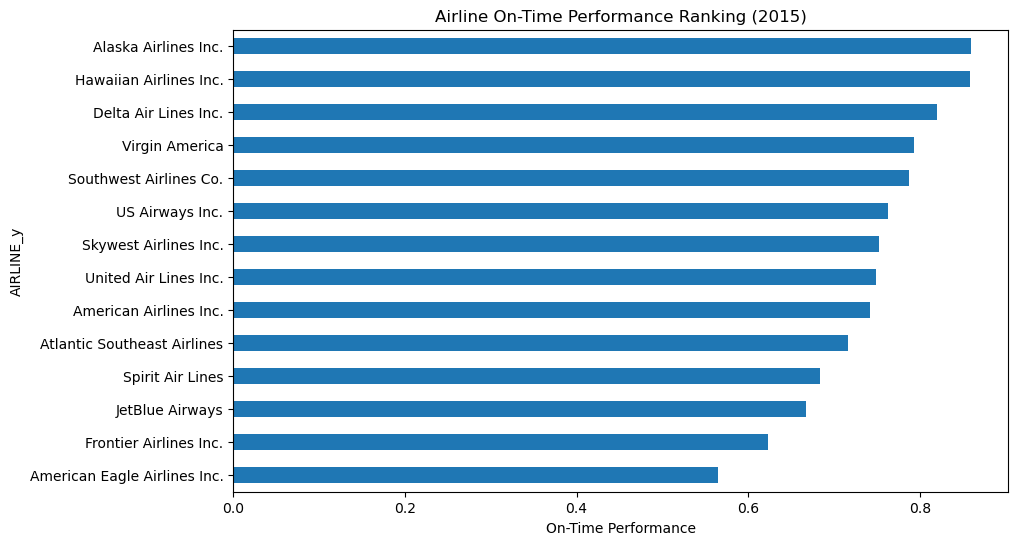

In [4]:
# Visualization
plt.figure(figsize=(10,6))
airline_stats['on_time_rate'].sort_values().plot(kind='barh')
plt.title('Airline On-Time Performance Ranking (2015)')
plt.xlabel('On-Time Performance')
plt.show()

In [6]:
# Step 4: Airport Delay Analysis
# Top 10 Departure Airports by Delay
origin_delay=flights.groupby('ORIGIN_AIRPORT_x').agg(
                                                     avg_delay=('DEPARTURE_DELAY','mean'),
                                                     flight_count=('FLIGHT_NUMBER','count')
                                                     ).sort_values(by='avg_delay',ascending=False).head(10)
origin_delay

,avg_delay,flight_count
ORIGIN_AIRPORT_x,,
TTN,39.761711,516
ILG,34.711538,55
OTH,26.305556,39
SCE,24.116788,146
ABR,23.261194,137
SMX,22.984962,135
BPT,22.842697,202
CEC,22.311475,135
BGR,21.900000,22


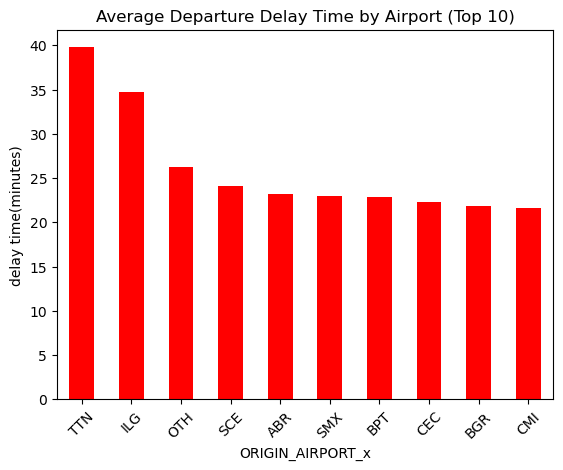

In [7]:
# Visualization
origin_delay['avg_delay'].plot(kind='bar',color='red')
plt.title('Average Departure Delay Time by Airport (Top 10)')
plt.ylabel('delay time(minutes)')
plt.xticks(rotation=45)
plt.show()


In [8]:
# Step 5: Delay Cause Analysis
# Calculate Proportion of Each Delay Type
delay_reasons=flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].mean()
delay_reasons

AIR_SYSTEM_DELAY       13.692554
SECURITY_DELAY          0.057328
AIRLINE_DELAY          18.203577
LATE_AIRCRAFT_DELAY    22.921458
WEATHER_DELAY           3.545277
dtype: float64

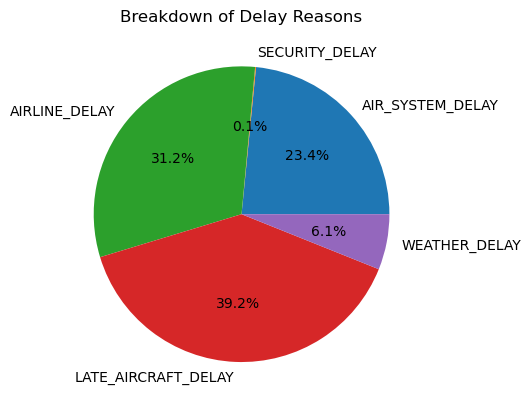

In [23]:
delay_reasons.plot(kind='pie',autopct='%1.1f%%')
plt.title('Breakdown of Delay Reasons')
plt.ylabel('')
plt.show()